In [1147]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

In [1148]:
warnings.filterwarnings("ignore")

In [1149]:
df = pd.read_csv("Wrangled_Playstore.csv")

In [1150]:
df_copy = df.copy()

In [1151]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


In [1152]:
df_copy[df_copy.duplicated(subset=["App"])].head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,NaN,5000000.0,Free,0.0,Everyone,Business,Varies with device,4.0.3 and up,26,2,2018
236,Box,BUSINESS,4.2,159872,NaN,10000000.0,Free,0.0,Everyone,Business,Varies with device,Varies with device,31,7,2018
239,Google My Business,BUSINESS,4.4,70991,NaN,5000000.0,Free,0.0,Everyone,Business,2.19.0.204537701,4.4 and up,24,7,2018
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37000.0,10000000.0,Free,0.0,Everyone,Business,4.1.28165.0716,4.0 and up,20,7,2018
261,join.me - Simple Meetings,BUSINESS,4.0,6989,NaN,1000000.0,Free,0.0,Everyone,Business,4.3.0.508,4.4 and up,16,7,2018


In [1153]:
df_copy.drop_duplicates(subset=["App"], keep="first", inplace=True)

In [1154]:
df_copy.shape

(9659, 15)

In [1155]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10840 entries, 0 to 10839
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10840 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9366 non-null   float64
 3   Reviews         10840 non-null  int64  
 4   Size            9145 non-null   float64
 5   Installs        10840 non-null  float64
 6   Type            10839 non-null  object 
 7   Price           10840 non-null  float64
 8   Content Rating  10840 non-null  object 
 9   Genres          10840 non-null  object 
 10  Current Ver     10832 non-null  object 
 11  Android Ver     10838 non-null  object 
 12  Day             10840 non-null  int64  
 13  Month           10840 non-null  int64  
 14  Year            10840 non-null  int64  
dtypes: float64(4), int64(4), object(7)
memory usage: 1.2+ MB


In [1156]:
numerical_column = [x for x in df_copy.columns if df_copy[x].dtype != "O"]
categorical_column = [x for x in df_copy.columns if df_copy[x].dtype == "O"]

In [1157]:
print(numerical_column, len(numerical_column))
print(categorical_column, len(categorical_column))

['Rating', 'Reviews', 'Size', 'Installs', 'Price', 'Day', 'Month', 'Year'] 8
['App', 'Category', 'Type', 'Content Rating', 'Genres', 'Current Ver', 'Android Ver'] 7


In [1158]:
for x in df_copy.columns:
    print(df_copy[x].value_counts(normalize=True) * 100)
    print("==========================")

App
iHoroscope - 2018 Daily Horoscope & Astrology         0.010353
Photo Editor & Candy Camera & Grid & ScrapBook        0.010353
Coloring book moana                                   0.010353
U Launcher Lite – FREE Live Cool Themes, Hide Apps    0.010353
Sketch - Draw & Paint                                 0.010353
                                                        ...   
Pink Silver Bow Keyboard Theme                        0.010353
Art Drawing Ideas                                     0.010353
Anime Manga Coloring Book                             0.010353
Easy Origami Ideas                                    0.010353
I Creative Idea                                       0.010353
Name: proportion, Length: 9659, dtype: float64
Category
FAMILY                 18.966767
GAME                    9.928564
TOOLS                   8.561963
BUSINESS                4.348276
MEDICAL                 4.089450
PERSONALIZATION         3.892743
PRODUCTIVITY            3.872036
LIFESTYLE       

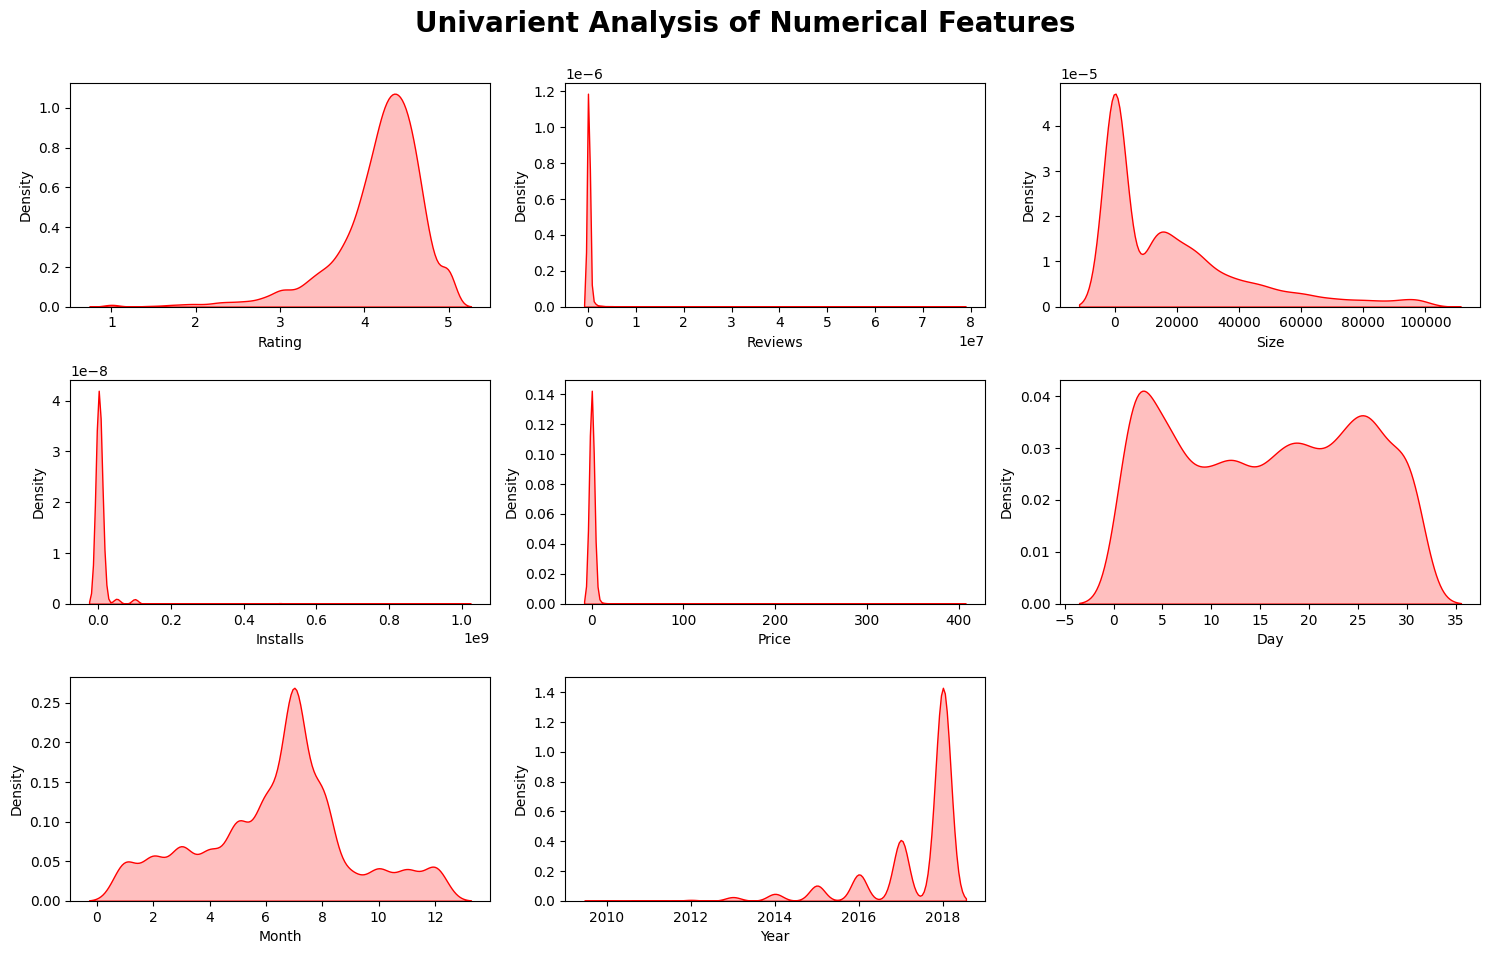

In [1159]:
plt.figure(figsize=(15,15))
plt.suptitle("Univarient Analysis of Numerical Features", fontsize = 20, fontweight = "bold", y = 1.0)

for i , x in enumerate(numerical_column, start=0):
    plt.subplot(5, 3, i + 1)
    sns.kdeplot(data=df_copy, fill = True, color ="red", x=x)
    plt.xlabel(x)
    plt.tight_layout()
plt.show()

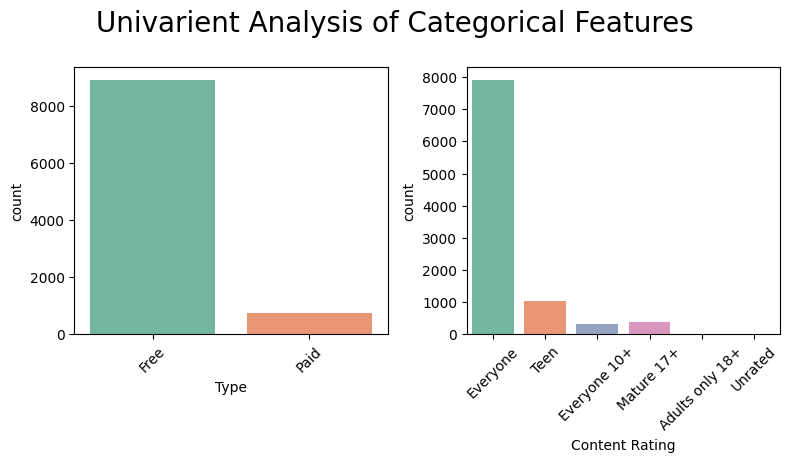

In [1160]:
col = ["Type", "Content Rating"]
plt.figure(figsize=(8,4))
plt.suptitle("Univarient Analysis of Categorical Features", y = 1.0 , fontsize = 20, fontweight = "normal")
for i , x in enumerate(col, start=0):
    plt.subplot(1,2,i + 1)
    sns.countplot(data=df_copy, x=x, palette = "Set2")
    plt.tight_layout()
    plt.xlabel(x)
    plt.xticks(rotation = 45)
plt.show()

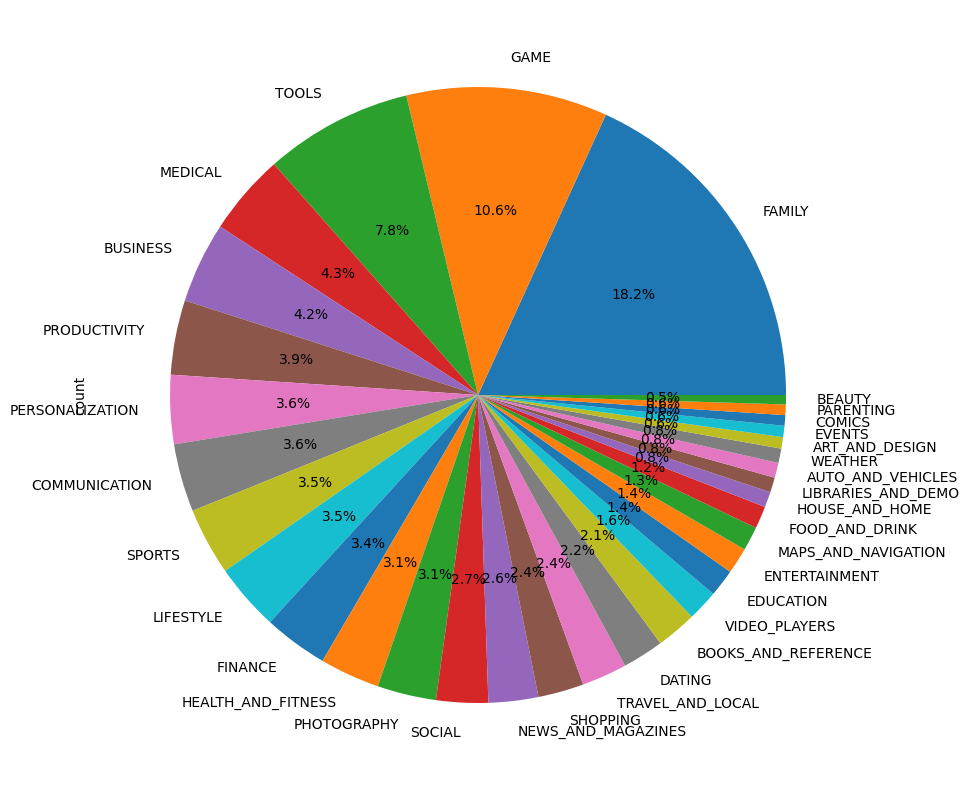

In [1161]:
df["Category"].value_counts().plot.pie(y = df["Category"],  autopct = "%1.1f%%", figsize = (10,10))
plt.show()

In [1162]:
counts_pd = pd.DataFrame(data=df_copy["Category"].value_counts()).rename(columns={"count" : "Count"})
counts_pd.index.name = None

In [1163]:
counts_pd.sort_values(by = "Count", ascending=False, inplace=True)

In [1164]:
# counts_pd

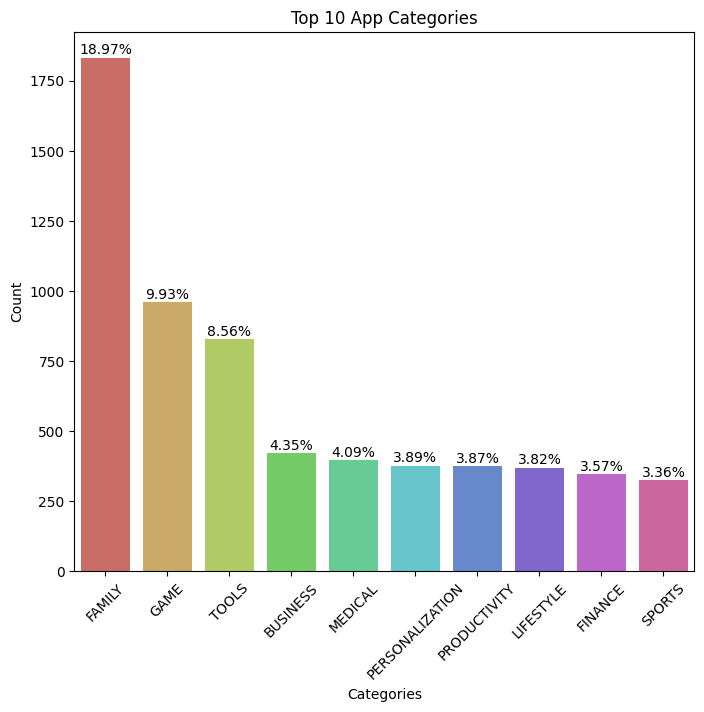

In [1165]:
plt.figure(figsize=(8,7))
sns.barplot(data=counts_pd[:10], y = "Count", x = counts_pd.index[:10], palette="hls")
total = counts_pd["Count"].sum()
counts_pd["Percentage"] = counts_pd["Count"].map(lambda x : (x / total * 100).round(2))
for i , j in enumerate(counts_pd["Count"][:10], start=0):
    plt.text(x = i, y = j + 2, s = f"{counts_pd['Percentage'].iloc[i]}%", ha = "center", va = "bottom", fontsize = 10)
plt.title("Top 10 App Categories")
plt.xticks(rotation = 45)
plt.xlabel("Categories")
plt.show()

In [1166]:
df_copy.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Current Ver,Android Ver,Day,Month,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19000.0,10000.0,Free,0.0,Everyone,Art & Design,1.0.0,4.0.3 and up,7,1,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14000.0,500000.0,Free,0.0,Everyone,Art & Design;Pretend Play,2.0.0,4.0.3 and up,15,1,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000.0,Free,0.0,Everyone,Art & Design,1.2.4,4.0.3 and up,1,8,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25000.0,50000000.0,Free,0.0,Teen,Art & Design,Varies with device,4.2 and up,8,6,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000.0,Free,0.0,Everyone,Art & Design;Creativity,1.1,4.4 and up,20,6,2018


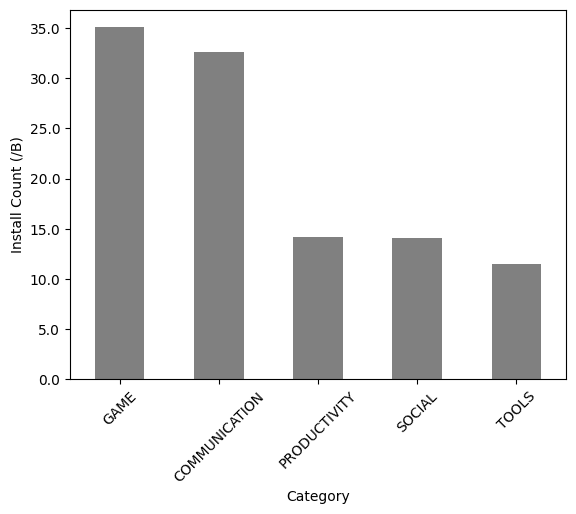

In [1167]:
ax = df.groupby(by ="Category")["Installs"].sum().sort_values(ascending=False)[:5].plot.bar(color = "grey")
plt.ylabel("Install Count (/B)")
# ax.ticklabel_format(style='plain', axis='y')
import matplotlib.ticker as mticker
ax.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, _: f'{x*1e-9:.1f}'))
plt.xticks(rotation=45)
plt.show()

In [1168]:
df[df["Rating"] == 5].shape[0]

274

In [1169]:
columns = df.groupby(by ="Category")["Installs"].sum().sort_values(ascending=False)[:5].index
for x in columns:
    df.groupby(by="Category").get_group(x).sort_values(by="Installs")[:5]["App"].map(lambda x : print(x))
    print(" ")


Mu.F.O.
D+H Reaction Wall
Ra Ga Ba
Bi-Tank Ads Free
YAKALA AY
 
BA SALES
Of the wall Arapaho bk
Test Server SMS FA
iCluster - The DX-Cluster database
EJ messenger
 
cronometra-br
DZ Register
EC Sampler
DT Freight
CQ Electrical Group
 
Pekalongan CJ
Ak Parti Yardım Toplama
Amleen Ey
BH Connect
C.P. CERVANTES (TOBARRA)
 
db Meter - sound level meter with data logging
mySharpBranded CI Test
DQ Akses
Cathy AH
FD CANNECT
 
